# EDA
 
El proyecto contiene un análisis exploratorio de datos (EDA) de la información recuperada de los datos abiertos de ENACOM

### Fuente de datos
Se tienen como fuente de datos los siguientes archivos excel de ENACOM
[Datasets principales](https://indicadores.enacom.gob.ar/datos-abiertos)
- Internet.xlsx (obligatorio)
- Telefonia_movil.xlsx
- Television.xlsx
- telefonia_fija.xlsx
- Portabilidad.xlsx
- servicios_postales.xlsx
- mapa_conectividad.xlsx

Se importan las siguientes librerias

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import geopandas as gpd
import pyproj as CRS
import warnings
warnings.filterwarnings("ignore")

### Acceso por Tecnologia

In [2]:
df_at = pd.read_excel('Data/Internet.xlsx', sheet_name='Accesos Por Tecnología')

Se muestran los primeros registros

Los datos corresponden a los tipos de acceso a internet por año trimestres y provincia

In [3]:
df_at.head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2024,1,Buenos Aires,203297.0,2790663.0,1799013.0,150290.0,101294.0,5044557.0
1,2024,1,Capital Federal,70108.0,1177475.0,203756.0,4493.0,48879.0,1504711.0
2,2024,1,Catamarca,5901.0,11025.0,56542.0,1384.0,81.0,74933.0
3,2024,1,Chaco,11343.0,58929.0,64463.0,8404.0,12404.0,155543.0
4,2024,1,Chubut,26306.0,77217.0,26356.0,30867.0,9930.0,170676.0


Se procede a realizar la extraccion transformacion y carga de los Datos

Se muestra la informacion de las variables

In [4]:
df_at.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           985 non-null    object 
 1   Trimestre     985 non-null    object 
 2   Provincia     984 non-null    object 
 3   ADSL          984 non-null    float64
 4   Cablemodem    984 non-null    float64
 5   Fibra óptica  984 non-null    float64
 6   Wireless      984 non-null    float64
 7   Otros         984 non-null    float64
 8   Total         984 non-null    float64
dtypes: float64(6), object(3)
memory usage: 69.5+ KB


Se muestran los valores nulos detectados

In [5]:
print(df_at.isnull().sum())

Año             1
Trimestre       1
Provincia       2
ADSL            2
Cablemodem      2
Fibra óptica    2
Wireless        2
Otros           2
Total           2
dtype: int64


Se muestran los registros con provincia nula

In [6]:
print(df_at[df_at['Provincia'].isnull()])

     Año                                          Trimestre Provincia  ADSL  \
984  NaN                                                NaN       NaN   NaN   
985    *  Los datos provinciales no coinciden a nivel na...       NaN   NaN   

     Cablemodem  Fibra óptica  Wireless  Otros  Total  
984         NaN           NaN       NaN    NaN    NaN  
985         NaN           NaN       NaN    NaN    NaN  


Se determina que hay dos registros con valores nulos e informacion resaltada en * se eliminan registros nulos

In [7]:
df_at.dropna(subset=['Provincia'], inplace=True)

Se muestran los valores duplicados

In [8]:
print(df_at[df_at.duplicated()])

Empty DataFrame
Columns: [Año, Trimestre, Provincia, ADSL, Cablemodem, Fibra óptica, Wireless, Otros, Total]
Index: []


Se muestran los Años unicos

In [9]:
print(df_at['Año'].unique())

[2024 2023 2022 2021 2020 2019 '2019 *' 2018 2017 2016 2015 2014]


Se muestran los Trimestres unicos

In [10]:
print(df_at['Trimestre'].unique())

[1 4 3 2 '3 *' '2 *' '1 *']


Se eliminan los asteriscos de la columna Año asi como los espacios en blanco

In [11]:
df_at['Año'] = df_at['Año'].astype(str).str.replace(r'\*', '', regex=True).str.strip()

Se eliminan los asteriscos de la columna Trimestre asi como los espacios en blanco

In [12]:
df_at['Trimestre'] = df_at['Trimestre'].astype(str).str.replace(r'\*', '', regex=True).str.strip()

Se convierte el Año a numero entero

In [13]:
df_at['Año'] = pd.to_numeric(df_at['Año'], errors='coerce').fillna(0).astype(int)

Se convierte el Trimestre a numero entero

In [14]:
df_at['Trimestre'] = pd.to_numeric(df_at['Trimestre'], errors='coerce').fillna(0).astype(int)

Se convierten la columna ADSL, Cablemodem, Fibra óptica, Wireless, Otros y Total a numeros enteros

In [15]:
df_at[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros', 'Total']] = df_at[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros', 'Total']].astype(int)

Convertir trimestre a mes 

In [42]:
#def trimestre_a_mes(trimestre):
#    return {
#        1: '01',
#        2: '04',
#        3: '07',
#        4: '10'
#    }[trimestre]

Crear columna de fecha en formato YYYY-MM-DD

In [16]:
#df_at['Fecha'] = df_at.apply(lambda row: f"{row['Año']}-{trimestre_a_mes(row['Trimestre'])}-01", axis=1)

df_at['Fecha'] = pd.to_datetime(df_at.apply(lambda x: f"{x['Año']}-{x['Trimestre']*3-2}-01", axis=1))

Convertir columna 'Fecha' a tipo datetime

In [63]:
#df_at['Fecha'] = pd.to_datetime(df_at['Fecha'])

Agrupar por fecha para ver tendencias

In [17]:
df_time_series = df_at.groupby('Fecha').sum()


### Serie de Tiempo para detectar tendencias

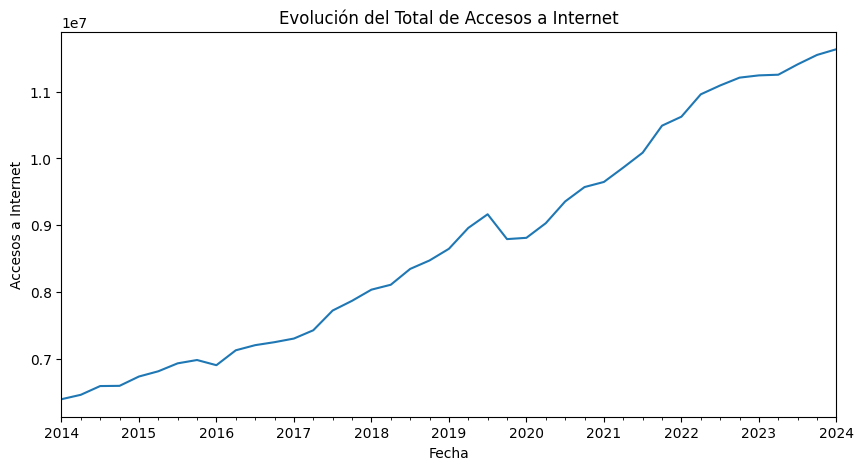

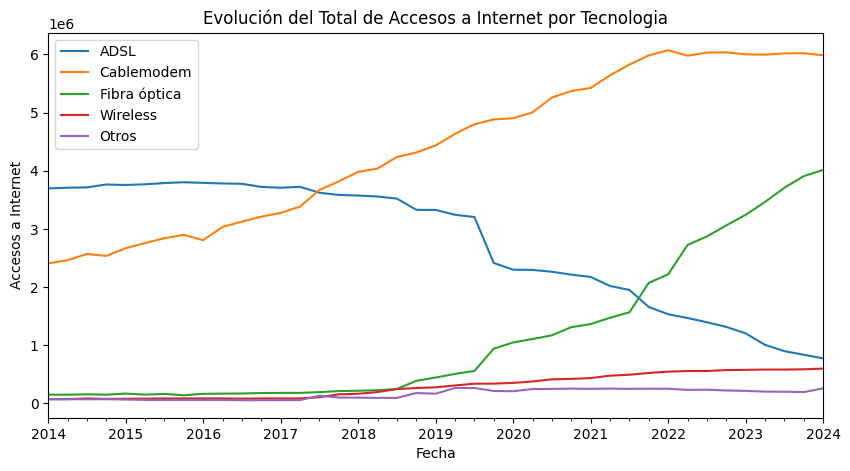

In [18]:
plt.figure(figsize=(10,5))
df_time_series['Total'].plot()
plt.title(f'Evolución del Total de Accesos a Internet')
plt.ylabel('Accesos a Internet')
plt.show()
plt.figure(figsize=(10,5))
for i, col in enumerate(['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']):
    df_time_series[col].plot()
    plt.title(f'Evolución del Total de Accesos a Internet por Tecnologia')
plt.legend()
plt.ylabel('Accesos a Internet')
plt.show()

### Descripción General de los Gráficos
Los gráficos presentados muestran la evolución en el tiempo del número de accesos a internet en Argentina, divididas por tipo de tecnología (ADSL, cablemódem, fibra óptica, wireless, otros y el total). Cada línea representa la cantidad de accesos para un tipo de tecnología específico a lo largo de los años.

### Interpretación de las Tendencias
### Tendencias Generales:
Declive del ADSL: Se observa una clara tendencia a la baja en el número de accesos ADSL a lo largo de todo el período. Esto es esperable debido a la obsolescencia de esta tecnología y la mayor adopción de opciones más rápidas y estables.

Crecimiento sostenido del cablemódem y fibra óptica: Tanto el cablemódem como la fibra óptica muestran un crecimiento constante durante el período analizado. Esto indica una migración de los usuarios hacia tecnologías de mayor ancho de banda.

Expansión del wireless: Los accesos wireless también experimentaron un crecimiento significativo, especialmente en los últimos años. Esto se debe al aumento de la penetración de dispositivos móviles y la expansión de las redes inalámbricas.

Volatilidad en "Otros": La categoría "Otros" presenta una mayor variabilidad, lo que podría indicar la inclusión de tecnologías emergentes o menos comunes que experimentan fluctuaciones en su adopción.

Crecimiento sostenido del total: A pesar del declive del ADSL, el número total de accesos a internet muestra un crecimiento continuo, impulsado principalmente por el aumento de las conexiones de cablemódem, fibra óptica y wireless.

### Tendencias Específicas:
Aceleración en la adopción de fibra óptica: En los últimos años, se observa una aceleración en el crecimiento de los accesos de fibra óptica, lo que sugiere una mayor inversión en infraestructura y una demanda creciente por velocidades de conexión más altas.

Estabilización del cablemódem: El crecimiento del cablemódem parece haberse estabilizado en los últimos años, lo que podría indicar una saturación del mercado o una competencia más intensa con la fibra óptica.

Fluctuaciones en el wireless: Las conexiones wireless presentan cierta estacionalidad o fluctuaciones relacionadas con eventos específicos (por ejemplo, promociones, lanzamientos de nuevos dispositivos).

### Resumen:
En resumen, los gráficos muestran una clara evolución en el panorama de las conexiones a internet en Argentina, con un desplazamiento hacia tecnologías de mayor velocidad y capacidad. Sin embargo, es necesario realizar un análisis más profundo para comprender las causas de estas tendencias y sus implicaciones para el futuro.



Se guarda el archivo de Accesos por Tecnología

In [19]:
df_at.to_excel('Dataframe/df_at.xlsx',index=False, sheet_name='Accesos Por Tecnología')

### Acceso de internet por cada 100 hogares
Se lee el primer archivo Internet.xlsx y la hoja Penetracion-hogares

In [20]:
df_ph = pd.read_excel('Data/Internet.xlsx', sheet_name='Penetracion-hogares')

Se muestran los primeros registros

Los datos corresponden a los tipos accesos a internet por cada 100 hogares por año trimestres y provincia

In [21]:
df_ph.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2024,1,Buenos Aires,81.10
1,2024,1,Capital Federal,119.53
2,2024,1,Catamarca,68.82
3,2024,1,Chaco,46.70
4,2024,1,Chubut,84.89


Se muestra la informacion de las variables

In [22]:
df_ph.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           984 non-null    int64  
 1   Trimestre                     984 non-null    int64  
 2   Provincia                     984 non-null    object 
 3   Accesos por cada 100 hogares  984 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 30.9+ KB


Crear columna de fecha en formato YYYY-MM-DD

In [23]:
df_ph['Fecha'] = pd.to_datetime(df_ph.apply(lambda x: f"{x['Año']}-{x['Trimestre']*3-2}-01", axis=1))

Crearemos un gráfico de cajas para ver las distribuciones, variabilidad de los datos y diferencias entre los accessos cada 100 hogares en las distintas provincias.

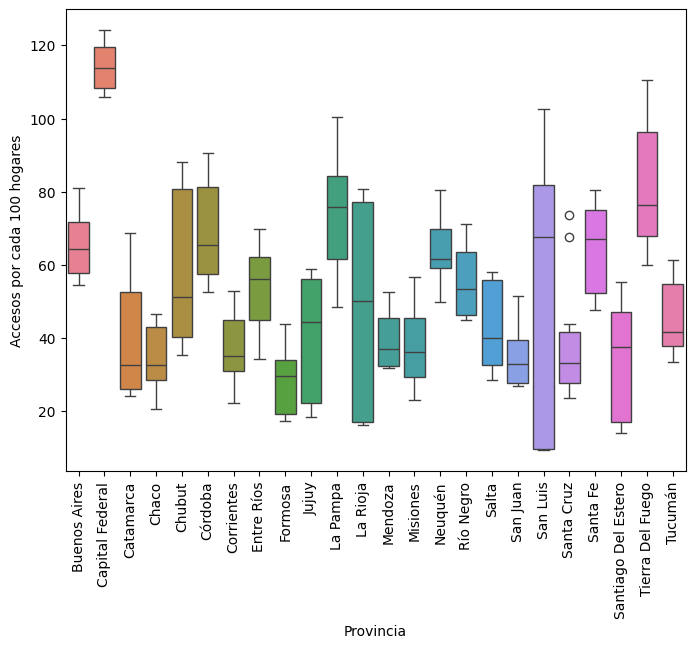

In [24]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Provincia', y='Accesos por cada 100 hogares',hue='Provincia', data= df_ph );
plt.xticks(rotation=90)
plt.show()

### Análisis del Gráfico de Boxplot: Acceso a Internet cada 100 hogares por Provincia en Argentina

### Descripción del Gráfico
El gráfico de boxplot presentado ofrece una visual clara de la distribución de los accesos a internet por cada 100 hogares en las diferentes provincias de Argentina. Cada caja representa una provincia, y los elementos dentro de cada caja nos proporcionan información sobre la distribución de los datos.

### Interpretación de los Resultados
Desigualdad en el acceso: El gráfico muestra una clara desigualdad en el acceso a internet entre las diferentes provincias argentinas. Algunas provincias, como Buenos Aires, Tierra del Fuego, Capital Federal y La Pampa presentan una mediana y un rango superior, lo que indica una mayor penetración de internet en los hogares. Por otro lado, provincias como Chaco y Formosa muestran una mediana y un rango inferior, lo que sugiere una menor disponibilidad de servicios de internet.

Variabilidad entre provincias: La altura de las cajas y la longitud de los bigotes varían considerablemente entre las provincias, lo que indica una alta variabilidad en la distribución de los accesos a internet. Esto sugiere que factores como la infraestructura, la densidad poblacional y el nivel socioeconómico influyen significativamente en la disponibilidad de servicios de internet a nivel provincial.

Presencia de valores atípicos (outliers): Algunos puntos aislados (valores atípicos) se observan en algunas provincias, lo que indica que existen hogares con un acceso a internet mucho mayor o menor que el promedio de su provincia. Estos valores atípicos podrían estar relacionados con factores específicos de esas localidades, como la presencia de centros urbanos o rurales, o la disponibilidad de servicios de alta velocidad.

### Resumen
En resumen, el gráfico de boxplot proporciona una visión general de la desigualdad en el acceso a internet en Argentina.

Se guarda el archivo de Penetracion-hogares

In [25]:
df_ph.to_excel('Dataframe/df_ph.xlsx',index=False, sheet_name='Penetracion-hogares')

### Accesos por Tecnología Provincia en 2024-1
Ahora viduslizaremos los datos de df_at de accesos por tecnología por provincia del año 2024-1 y eliminamos los campos 'Total', 'Año', 'Trimestre', 'Otros', 'Fecha'

In [26]:
data = df_at[df_at['Año'] == 2024]
data = data.drop(columns=['Total', 'Año', 'Trimestre', 'Otros','Fecha'])

Mostramos el gráfico de Barras de accesos por provincia y tecnología el ultimo año 2024

In [27]:
data = pd.melt(data, id_vars='Provincia', var_name='Tecnologías', value_name='Value')

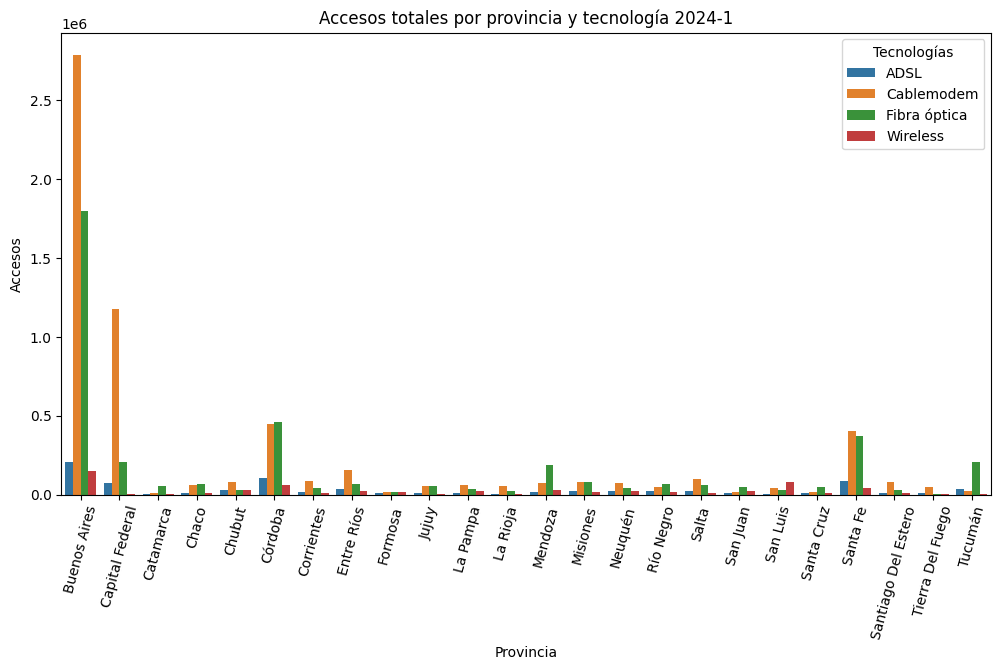

In [28]:
#Gráfico de barras Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=data,x='Provincia', y='Value', hue= 'Tecnologías')
plt.xlabel('Provincia')
plt.ylabel('Accesos')
plt.title('Accesos totales por provincia y tecnología 2024-1')
plt.xticks(rotation=75)
plt.legend(title='Tecnologías');

### Descripción del Gráfico
El gráfico presenta una comparación de los accesos a internet por provincia en Argentina, desglosados por tecnología (ADSL,Cablemodem, Fibra Óptica y Wireless). Cada barra representa una provincia, y la altura de cada segmento de la barra indica el
número de accesos para cada tecnología.


### Interpretación de Resultados:

Dominancia de Buenos Aires y Capital Federal: Estas dos jurisdicciones concentran una proporción significativa de los accesos totales a internet, en todas las tecnologías. Esto es esperable debido a su mayor densidad poblacional y desarrollo económico.

Variabilidad entre provincias: Existe una gran disparidad en el número de accesos entre provincias. Algunas provincias, además de Buenos Aires y Capital Federal, como Córdoba y Santa Fe, presentan un número considerable de accesos, mientras que otras, como Formosa y La Rioja, tienen un número significativamente menor.

Fibra Óptica como tecnología predominante: En general, la fibra óptica parece ser la tecnología con mayor crecimiento y penetración en las provincias, superando a ADSL y cablemódem en muchas jurisdicciones. Esto indica una tendencia hacia conexiones de mayor velocidad y estabilidad.

Presencia de todas las tecnologías: A pesar de la creciente popularidad de la fibra óptica, todas las tecnologías analizadas siguen estando presentes en todas las provincias, lo que sugiere una diversidad de opciones para los usuarios, aunque con diferentes niveles de penetración.

Wireless como complemento: La tecnología wireless, que incluye conexiones móviles y Wi-Fi, complementa a las tecnologías fijas especialmente en áreas rurales o con menor infraestructura.

### Análisis por Tecnología

ADSL: Esta tecnología, aunque todavía presente, muestra una tendencia a la baja en muchas provincias, siendo superada por otras opciones como la fibra óptica y el cablemódem. Esto se debe a las limitaciones en términos de velocidad y estabilidad que presenta ADSL.

Cablemódem: El cablemódem sigue siendo una opción popular en muchas provincias, especialmente en áreas urbanas. Sin embargo, su crecimiento se ha visto limitado por la expansión de la fibra óptica.

Fibra Óptica: La fibra óptica es la tecnología que ha experimentado un mayor crecimiento en los últimos años, ofreciendo velocidades de conexión mucho más altas y una mayor estabilidad. Su expansión ha sido impulsada por inversiones de los operadores y por las demandas de los usuarios.

Wireless: La tecnología wireless ha ganado importancia en los últimos años, especialmente en áreas rurales y en dispositivos móviles. Sin embargo, su velocidad y estabilidad pueden variar dependiendo de la infraestructura y la cobertura.

### Conclusiones
Brecha digital: Los datos del gráfico evidencian una brecha digital entre las provincias, con algunas jurisdicciones presentando un acceso a internet mucho mayor que otras. Esta brecha puede tener un impacto significativo en el desarrollo económico y social de las regiones menos conectadas.

Políticas públicas: Es necesario implementar políticas públicas que promuevan la expansión de las redes de fibra óptica y el acceso a internet en todo el territorio nacional, con un enfoque especial en las áreas rurales y de menor desarrollo.

Competencia entre operadores: La competencia entre los operadores de telecomunicaciones es fundamental para garantizar la calidad de los servicios y la reducción de precios.

Demanda de servicios digitales: El creciente uso de servicios digitales, como la telemedicina, la educación en línea y el trabajo remoto, ha aumentado la demanda de conexiones a internet de alta velocidad.

### Accesos por Velocidad
Se lee el primer archivo Internet.xlsx y la hoja Accesos por Velocidad

In [29]:
df_av = pd.read_excel('Data/Internet.xlsx', sheet_name='Accesos por velocidad')

Se muestran los primeros registros

Los datos corresponden a los tipos accesos a internet por niveles de velocidad por año trimestres y provincia

In [30]:
df_av.head()

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2024,1,Buenos Aires,26002.0,22510.0,221185.0,233225.0,241778.0,106418.0,4068292.0,125147.0,5044557.0
1,2024,1,Capital Federal,516.0,5418.0,29753.0,51415.0,37369.0,5957.0,1374283.0,0.0,1504711.0
2,2024,1,Catamarca,71.0,176.0,2872.0,3424.0,4204.0,1822.0,62294.0,70.0,74933.0
3,2024,1,Chaco,236.0,416.0,14156.0,9044.0,5533.0,5718.0,116624.0,3816.0,155543.0
4,2024,1,Chubut,111.0,1083.0,43828.0,31885.0,23024.0,20261.0,33844.0,16640.0,170676.0


Se muestra la informacion de las variables

In [31]:
df_av.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Año                  984 non-null    int64  
 1   Trimestre            984 non-null    int64  
 2   Provincia            984 non-null    object 
 3   HASTA 512 kbps       984 non-null    float64
 4   + 512 Kbps - 1 Mbps  984 non-null    float64
 5   + 1 Mbps - 6 Mbps    984 non-null    float64
 6   + 6 Mbps - 10 Mbps   984 non-null    float64
 7   + 10 Mbps - 20 Mbps  984 non-null    float64
 8   + 20 Mbps - 30 Mbps  984 non-null    float64
 9   + 30 Mbps            984 non-null    float64
 10  OTROS                978 non-null    float64
 11  Total                984 non-null    float64
dtypes: float64(9), int64(2), object(1)
memory usage: 92.4+ KB


Validamos los nulos en OTROS

In [32]:
df_av.isna().sum()

Año                    0
Trimestre              0
Provincia              0
HASTA 512 kbps         0
+ 512 Kbps - 1 Mbps    0
+ 1 Mbps - 6 Mbps      0
+ 6 Mbps - 10 Mbps     0
+ 10 Mbps - 20 Mbps    0
+ 20 Mbps - 30 Mbps    0
+ 30 Mbps              0
OTROS                  6
Total                  0
dtype: int64

Se convierten los nulos en 0

In [33]:
df_av['OTROS'] = df_av['OTROS'].apply(lambda x: x if pd.notna(x) else 0)

Se convierten los valorez  de las columnas de velocidades a entero

In [34]:
df_av['HASTA 512 kbps'] = pd.to_numeric(df_av['HASTA 512 kbps'], errors='coerce').fillna(0).astype(int)
df_av['+ 512 Kbps - 1 Mbps'] = pd.to_numeric(df_av['+ 512 Kbps - 1 Mbps'], errors='coerce').fillna(0).astype(int)
df_av['+ 1 Mbps - 6 Mbps'] = pd.to_numeric(df_av['+ 1 Mbps - 6 Mbps'], errors='coerce').fillna(0).astype(int)
df_av['+ 6 Mbps - 10 Mbps'] = pd.to_numeric(df_av['+ 6 Mbps - 10 Mbps'], errors='coerce').fillna(0).astype(int)
df_av['+ 10 Mbps - 20 Mbps'] = pd.to_numeric(df_av['+ 10 Mbps - 20 Mbps'], errors='coerce').fillna(0).astype(int)
df_av['+ 20 Mbps - 30 Mbps'] = pd.to_numeric(df_av['+ 20 Mbps - 30 Mbps'], errors='coerce').fillna(0).astype(int)
df_av['+ 30 Mbps'] = pd.to_numeric(df_av['+ 30 Mbps'], errors='coerce').fillna(0).astype(int)
df_av['HASTA 512 kbps'] = pd.to_numeric(df_av['HASTA 512 kbps'], errors='coerce').fillna(0).astype(int)
df_av['OTROS'] = pd.to_numeric(df_av['OTROS'], errors='coerce').fillna(0).astype(int)
df_av['Total'] = pd.to_numeric(df_av['Total'], errors='coerce').fillna(0).astype(int)

Se validan los duplicados

In [35]:
print(df_av[df_av.duplicated()])

Empty DataFrame
Columns: [Año, Trimestre, Provincia, HASTA 512 kbps, + 512 Kbps - 1 Mbps, + 1 Mbps - 6 Mbps, + 6 Mbps - 10 Mbps, + 10 Mbps - 20 Mbps, + 20 Mbps - 30 Mbps, + 30 Mbps, OTROS, Total]
Index: []


Se validan los años y trimestres

In [36]:
df_unicos = df_av[['Año', 'Trimestre']].drop_duplicates()
df_unicos=df_unicos.sort_values(['Año','Trimestre'],ascending=[False,False])
df_unicos.head()


,Año,Trimestre
24,2024,4
0,2024,1
48,2023,3
72,2023,2
96,2023,1


Se busca el valor del Año 2024 en el trimestre 4

In [37]:
df_av[(df_av['Año'] == 2024) & (df_av['Trimestre'] == 4)].head()

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
24,2024,4,Buenos Aires,26909,23962,228393,239339,246144,110876,4042646,93351,5011620
25,2024,4,Capital Federal,516,4544,26409,48083,33925,5829,1355061,0,1474367
26,2024,4,Catamarca,71,209,3065,3734,4423,1827,61181,77,74587
27,2024,4,Chaco,236,477,14811,10361,6247,5729,105485,4040,147386
28,2024,4,Chubut,111,1088,44276,31402,22843,20196,33665,16589,170170


Se reemplaza el valor del Año 2024 por 2023 en el trimestre 4

In [38]:
df_av.loc[(df_av['Año'] == 2024) & (df_av['Trimestre'] == 4), 'Año'] = 2023


Se busca el valor del Año 2023 en el trimestre 4

In [39]:
df_av[(df_av['Año'] == 2023) & (df_av['Trimestre'] == 4)].head()

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
24,2023,4,Buenos Aires,26909,23962,228393,239339,246144,110876,4042646,93351,5011620
25,2023,4,Capital Federal,516,4544,26409,48083,33925,5829,1355061,0,1474367
26,2023,4,Catamarca,71,209,3065,3734,4423,1827,61181,77,74587
27,2023,4,Chaco,236,477,14811,10361,6247,5729,105485,4040,147386
28,2023,4,Chubut,111,1088,44276,31402,22843,20196,33665,16589,170170


Crear columna de fecha en formato YYYY-MM-DD

In [40]:
df_av['Fecha'] = pd.to_datetime(df_av.apply(lambda x: f"{x['Año']}-{x['Trimestre']*3-2}-01", axis=1))

Grafico de Velocidad de Accesos en el tiempo

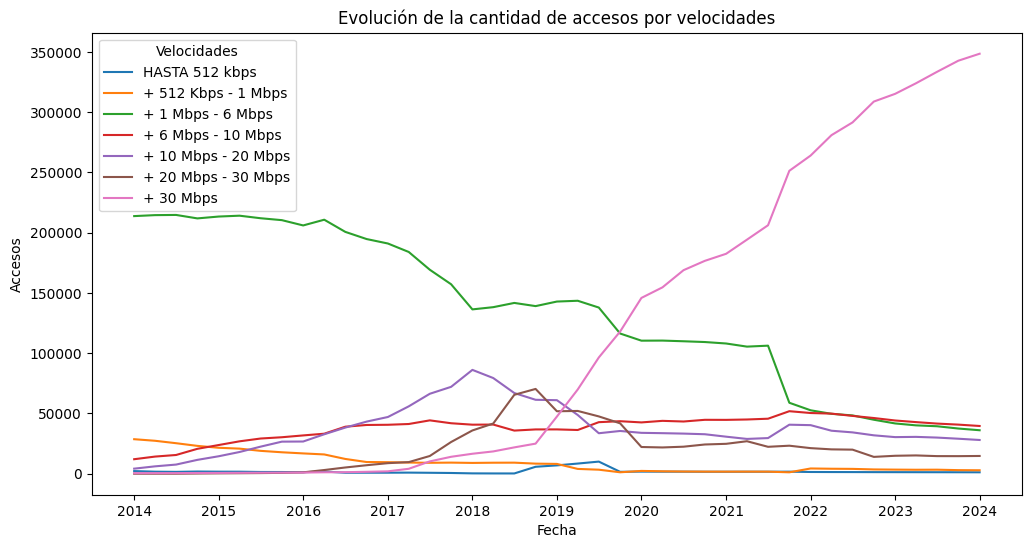

In [43]:
df_av_r = df_av.columns[3: -3].values

plt.figure(figsize=(12,6))
for i in df_av_r:
    sns.lineplot(data=df_av, x='Fecha', y=i,label=i,errorbar=None)
plt.xlabel('Fecha')
plt.ylabel('Accesos')
plt.title('Evolución de la cantidad de accesos por velocidades')
plt.legend(title= 'Velocidades')
plt.show()

### Descripción General del Gráfico
El gráfico presenta una evolución clara de la distribución de los accesos a internet según diferentes rangos de velocidad en un período comprendido entre 2014 y 2024. Las líneas de diferentes colores representan cada rango de velocidad, y el eje vertical indica la cantidad de accesos.

### Observaciones clave:

Declive en velocidades bajas: Se observa una disminución constante en el número de accesos a velocidades de hasta 1 Mbps, lo que indica una migración gradual de los usuarios hacia conexiones más rápidas.

Crecimiento en velocidades medias: Las velocidades entre 1 y 10 Mbps experimentaron un crecimiento inicial, pero luego se estabilizaron o incluso disminuyeron ligeramente en los últimos años. Esto sugiere una saturación en este rango y una migración hacia velocidades aún mayores.

Ascenso de velocidades altas: Las velocidades superiores a 10 Mbps muestran un crecimiento sostenido a lo largo de todo el período, especialmente a partir de 2018. Esto refleja una demanda creciente de conexiones más rápidas para actividades que requieren mayor ancho de banda, como el streaming de video en alta definición, los videojuegos en línea y el trabajo remoto.

Dominancia de velocidades superiores a 30 Mbps: A partir de 2022, las velocidades superiores a 30 Mbps se convierten en las más populares, superando a las demás categorías. Esto indica una tendencia clara hacia conexiones de mayor velocidad y una mejora general en la calidad de los servicios de internet.

### Análisis Detallado por Rangos de Velocidad

Hasta 512 kbps: La disminución constante en este rango es esperable, ya que estas velocidades son insuficientes para las aplicaciones actuales y los usuarios buscan alternativas más rápidas.

512 kbps - 1 Mbps: Este rango también muestra una tendencia a la baja, pero a un ritmo más lento que el rango anterior.
1 Mbps - 6 Mbps: Después de un crecimiento inicial, este rango se estabiliza y luego disminuye ligeramente.
6 Mbps - 10 Mbps: Similar al rango anterior, muestra un crecimiento inicial seguido de una estabilización.
10 Mbps - 20 Mbps: Este rango experimenta un crecimiento sostenido hasta alrededor de 2018, pero luego se desacelera.
20 Mbps - 30 Mbps: Este rango muestra un crecimiento constante y pero se estabiliza a partir de 2022.
Más de 30 Mbps: Este rango presenta el crecimiento más sostenido y dinámico, reflejando la demanda creciente de velocidades muy altas.

### Implicaciones y Tendencias

Mejora en la calidad de los servicios de internet: La migración hacia velocidades más altas indica una mejora general en la calidad de los servicios de internet ofrecidos por los proveedores.

Demanda de aplicaciones de alta banda ancha: El crecimiento de las velocidades altas está impulsado por la creciente demanda de aplicaciones que requieren mayor ancho de banda, como el streaming de video en 4K, los videojuegos en línea y el trabajo remoto.

Inversión en infraestructura: Para satisfacer esta demanda, los proveedores de servicios de internet deben invertir en la expansión y mejora de su infraestructura de red.

Brecha digital: A pesar de esta tendencia positiva, es probable que persista una brecha digital entre las zonas urbanas y rurales, y entre los diferentes grupos socioeconómicos.

Conclusiones
En conclusión, el gráfico muestra una clara evolución hacia velocidades de conexión a internet más altas, lo que refleja una demanda creciente de servicios de mayor calidad y una mejora general en la infraestructura de las redes. Sin embargo, es importante considerar que esta tendencia puede variar según las regiones y los países, y que persisten desafíos como la brecha digital y la necesidad de continuar invirtiendo en infraestructura.

Se guarda el archivo de Accesos por velocidad

In [44]:
df_av.to_excel('Dataframe/df_av.xlsx',index=False, sheet_name='Accesos por velocidad')

### Velocidad Media Por Provincia

Se lee el primer archivo Internet.xlsx y la hoja Velocidad % por prov

In [45]:
df_vp = pd.read_excel('Data/Internet.xlsx', sheet_name='Velocidad % por prov')

Se muestran los primeros registros

Los datos corresponden a la velocidad promedio de bajada de internet por año trimestres y provincias

In [46]:
df_vp.head()

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2024,1,Buenos Aires,159.13
1,2024,1,Capital Federal,229.94
2,2024,1,Catamarca,91.45
3,2024,1,Chaco,107.51
4,2024,1,Chubut,20.50


Se muestra la informacion de las variables

In [47]:
df_vp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     984 non-null    int64  
 1   Trimestre               984 non-null    int64  
 2   Provincia               984 non-null    object 
 3   Mbps (Media de bajada)  984 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 30.9+ KB


Se muestran los valores duplicados

In [48]:
print(df_vp[df_vp.duplicated()])

Empty DataFrame
Columns: [Año, Trimestre, Provincia, Mbps (Media de bajada)]
Index: []


Crear columna de fecha en formato YYYY-MM-DD

In [49]:
df_vp['Fecha'] = pd.to_datetime(df_vp.apply(lambda x: f"{x['Año']}-{x['Trimestre']*3-2}-01", axis=1))

### Grafico de Velocidad Media de Bajada por Provincia año 2024

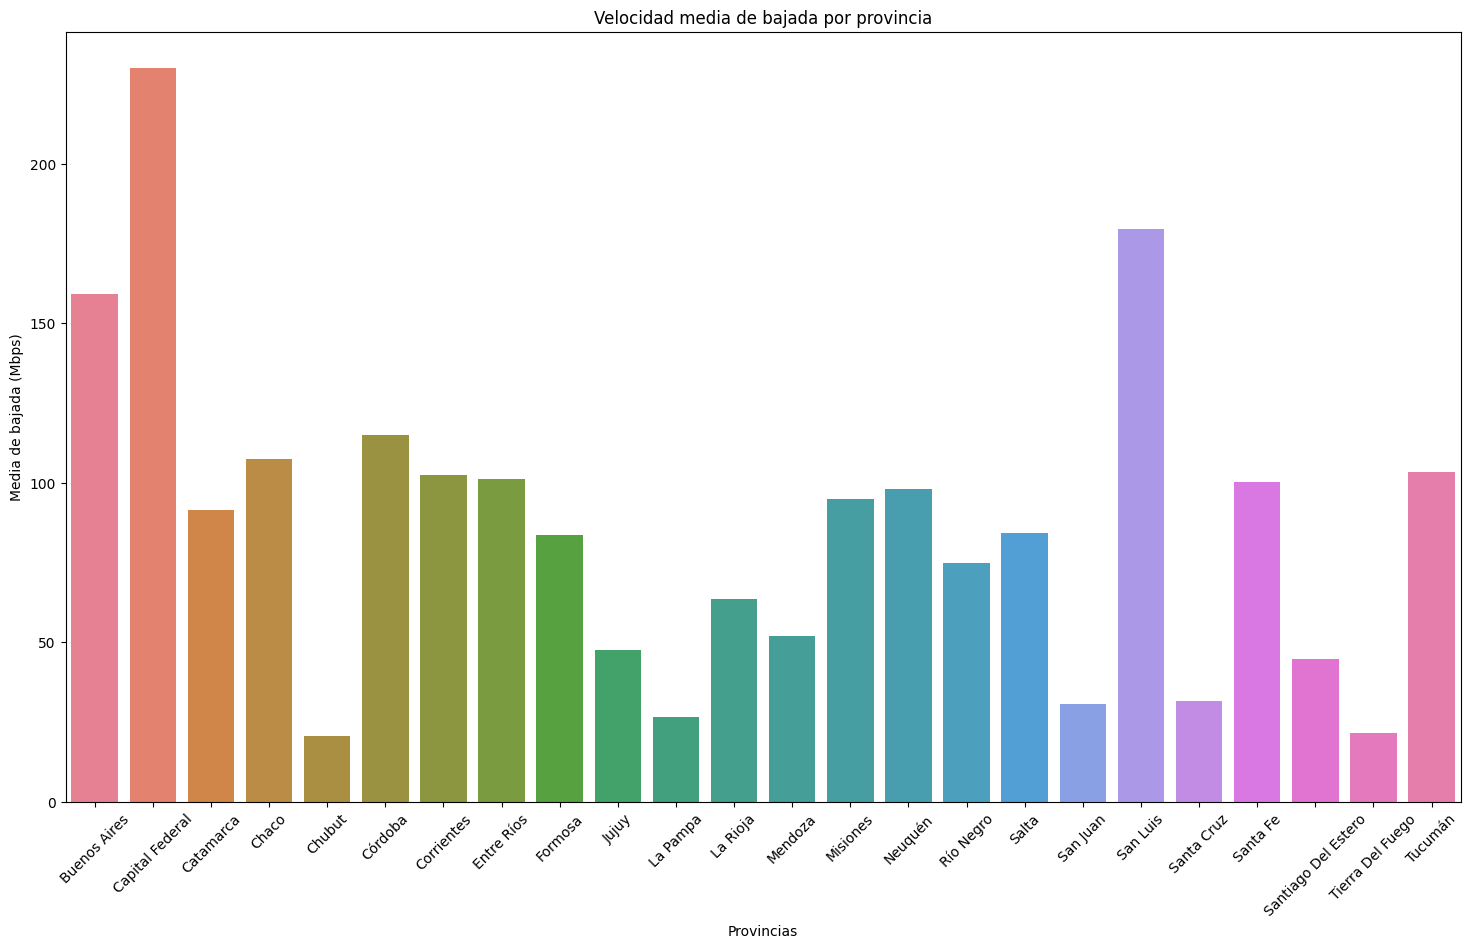

In [50]:
plt.figure(figsize=(18, 10))
sns.barplot(x='Provincia', y='Mbps (Media de bajada)',hue='Provincia', data=df_vp[df_vp['Año'] == 2024])
plt.xlabel('Provincias')
plt.ylabel('Media de bajada (Mbps)')
plt.title('Velocidad media de bajada por provincia')
plt.xticks(rotation=45)
plt.show()


### Descripcion General del Gráfico

El gráfico de barras presentado muestra una clara disparidad en la velocidad media de descarga de internet entre las diferentes provincias de Argentina. Observamos que existen provincias con velocidades significativamente superiores a otras, lo que indica una brecha digital considerable dentro del país.

### Observaciones Clave
Desigualdad regional: La velocidad media de descarga varía considerablemente entre las provincias. Algunas provincias cuentan con velocidades muy superiores a 200 Mbps, mientras que otras se encuentran por debajo de los 50 Mbps.

Concentración en algunas provincias: Algunas provincias se destacan por tener velocidades medias de descarga significativamente más altas, lo que sugiere una mayor inversión en infraestructura de telecomunicaciones en esas regiones.

Brecha digital: La gran disparidad en las velocidades de descarga evidencia una brecha digital importante entre las diferentes regiones del país. Esta brecha puede tener un impacto significativo en el acceso a la información, la educación, la economía y la calidad de vida de los ciudadanos.

### Posibles Causas de la Disparidad

Inversión en infraestructura: Las provincias con mayores velocidades de descarga probablemente han recibido inversiones más significativas en infraestructura de telecomunicaciones, como fibra óptica y redes móviles de alta velocidad.

Densidad poblacional: Las zonas urbanas y con mayor densidad poblacional suelen tener mejor conectividad debido a la mayor demanda de servicios de internet.

Política pública: Las políticas públicas en materia de telecomunicaciones pueden influir en la distribución de la infraestructura y en el acceso a internet en las diferentes regiones.

Condiciones geográficas: Las condiciones geográficas de algunas provincias pueden dificultar la implementación de redes de telecomunicaciones, aumentando los costos y reduciendo la velocidad de conexión.

### Conclusión

En conclusión, el gráfico muestra una clara desigualdad en el acceso a internet de alta velocidad en las diferentes provincias de Argentina. Para reducir esta brecha digital, es necesario implementar políticas públicas que promuevan la inversión en infraestructura y la expansión de la conectividad en todo el territorio nacional.

Se guarda el archivo de Velocidad % por prov

In [51]:
df_vp.to_excel('Dataframe/df_vp.xlsx',index=False, sheet_name='Velocidad % por prov')

### Ingresos

Se lee el primer archivo Internet.xlsx y la hoja Ingresos

In [52]:
df_in = pd.read_excel('Data/Internet.xlsx', sheet_name='Ingresos ')

Se muestran los primeros registros

Los datos corresponden a los Ingresos de internet por año y trimestres

In [53]:
df_in.head()

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2024,1,2.804191e+08,Ene-Mar 2024
1,2023,4,1.673760e+08,Oct-Dic 2023
2,2023,3,1.331066e+08,Jul-Sept 2023
3,2023,2,1.180603e+08,Jun-Mar 2023
4,2033,1,1.041350e+08,Ene-Mar 2023


Se muestra la informacion de las variables

In [54]:
df_in.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Año                        41 non-null     int64  
 1   Trimestre                  41 non-null     int64  
 2   Ingresos (miles de pesos)  41 non-null     float64
 3   Periodo                    41 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.4+ KB


Se muestran los valores duplicados

In [55]:
print(df_in[df_in.duplicated()])

Empty DataFrame
Columns: [Año, Trimestre, Ingresos (miles de pesos), Periodo]
Index: []


Se validan los Años y Trimestres

In [56]:
df_unicos_in = df_in[['Año', 'Trimestre']].drop_duplicates()
df_unicos_in=df_unicos_in.sort_values(['Año','Trimestre'],ascending=[False,False])
df_unicos_in.head()

,Año,Trimestre
4,2033,1
0,2024,1
1,2023,4
2,2023,3
3,2023,2


Se busca el valor del Año 2033 en el trimestre 1

In [57]:
df_in[(df_in['Año'] == 2033) & (df_in['Trimestre'] == 1)].head()

,Año,Trimestre,Ingresos (miles de pesos),Periodo
4,2033,1,1.041350e+08,Ene-Mar 2023


Se actualiza el Año 2033 a 2023 para el trimestre 1

In [58]:
df_in.loc[(df_in['Año'] == 2033) & (df_in['Trimestre'] == 1), 'Año'] = 2023

Se busca el valor del Año 2023 en el trimestre 1

In [59]:
df_in[(df_in['Año'] == 2023) & (df_in['Trimestre'] == 1)].head()

,Año,Trimestre,Ingresos (miles de pesos),Periodo
4,2023,1,1.041350e+08,Ene-Mar 2023


Crear columna de fecha en formato YYYY-MM-DD

In [60]:
df_in['Fecha'] = pd.to_datetime(df_in.apply(lambda x: f"{x['Año']}-{x['Trimestre']*3-2}-01", axis=1))

In [61]:
df_in.head()


,Año,Trimestre,Ingresos (miles de pesos),Periodo,Fecha
0,2024,1,2.804191e+08,Ene-Mar 2024,2024-01-01
1,2023,4,1.673760e+08,Oct-Dic 2023,2023-10-01
2,2023,3,1.331066e+08,Jul-Sept 2023,2023-07-01
3,2023,2,1.180603e+08,Jun-Mar 2023,2023-04-01
4,2023,1,1.041350e+08,Ene-Mar 2023,2023-01-01


### Gráfico de Ingresos por Año y Trimestre

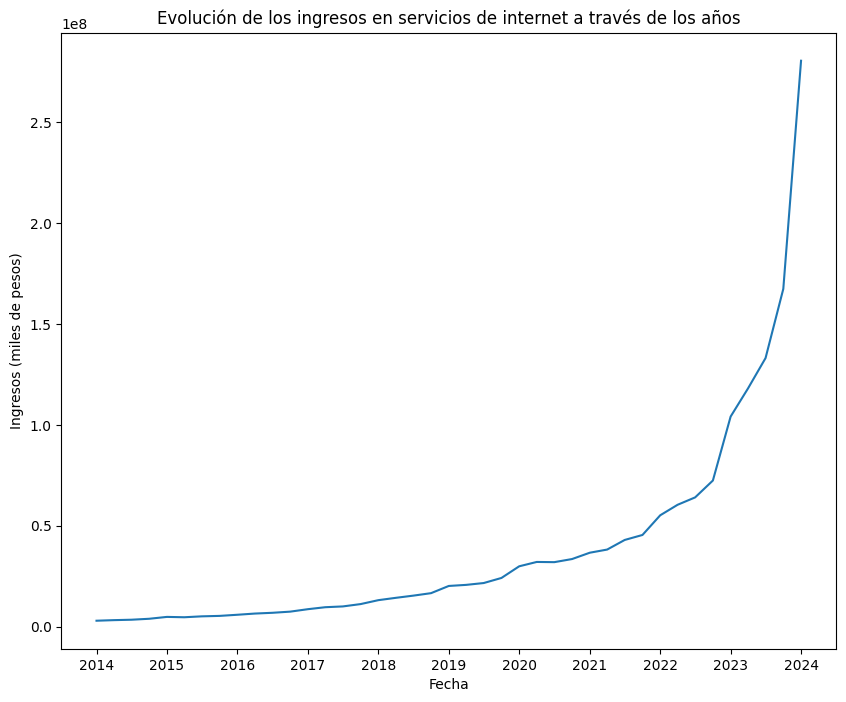

In [62]:
plt.figure(figsize=(10, 8))
sns.lineplot(x='Fecha', y='Ingresos (miles de pesos)', data= df_in)
plt.xlabel('Fecha')
plt.ylabel('Ingresos (miles de pesos)')
plt.title('Evolución de los ingresos en servicios de internet a través de los años')
plt.show()

En resumen, la imagen proporcionada ofrece una visión general de la tendencia al alza de los ingresos por servicios de internet,

Se guarda el archivo de Velocidad % por prov

In [76]:
df_in.to_excel('Dataframe/df_in.xlsx',index=False, sheet_name='Ingresos')

### Ubicacion Geográfica

Se procede a utilizar un archivo descargado de internet para obtener la latitud y longitud de las provincias

In [77]:
df_ug = pd.read_excel('Data/ar.xlsx', sheet_name='Sheet1')

Mostrar los datos

In [78]:
df_ug.head()

,city,lat,lng,country,iso2,admin_name,capital,population,population_proper
0,La Plata,-34.9211,-57.9544,Argentina,AR,Buenos Aires,admin,193144.0,193144.0
1,Buenos Aires,-34.6033,-58.3817,Argentina,AR,"Buenos Aires, Ciudad Autónoma de",primary,16710000.0,3054300.0
2,Rosario,-32.9575,-60.6394,Argentina,AR,Santa Fe,minor,1276000.0,1193605.0
3,Catamarca,-28.4667,-65.7833,Argentina,AR,Catamarca,admin,159139.0,159139.0
4,Comodoro Rivadavia,-45.8647,-67.4808,Argentina,AR,Chubut,minor,730266.0,730266.0


Filtrado de Provincias

In [79]:
df_ug=df_ug[(df_ug['capital']=='admin') | (df_ug['capital']=='primary')]

In [84]:
df_ug = df_ug.reset_index(drop=True)
df_ug.index = df_ug.index + 1

Listado de Provincias y CABA

In [107]:
df_ug

,city,lat,lng,country,iso2,admin_name,capital,population,population_proper
1,La Plata,-34.9211,-57.9544,Argentina,AR,Buenos Aires,admin,193144.0,193144.0
2,Buenos Aires,-34.6033,-58.3817,Argentina,AR,Capital Federal,primary,16710000.0,3054300.0
3,Catamarca,-28.4667,-65.7833,Argentina,AR,Catamarca,admin,159139.0,159139.0
4,Resistencia,-27.4514,-58.9867,Argentina,AR,Chaco,admin,291720.0,291720.0
5,Rawson,-43.3000,-65.1000,Argentina,AR,Chubut,admin,24616.0,24616.0
6,Córdoba,-31.4167,-64.1833,Argentina,AR,Córdoba,admin,2106734.0,1329604.0
7,Corrientes,-27.4833,-58.8167,Argentina,AR,Corrientes,admin,352646.0,352646.0
8,Paraná,-31.7331,-60.5297,Argentina,AR,Entre Ríos,admin,247863.0,247863.0
9,Formosa,-26.1833,-58.1833,Argentina,AR,Formosa,admin,234000.0,222226.0
10,San Salvador de Jujuy,-24.1833,-65.3000,Argentina,AR,Jujuy,admin,321789.0,321789.0


Se modifican los nombres de dos provincias para que coincidan con los datasets

In [106]:
df_ug.loc[(df_ug['admin_name'] == 'Buenos Aires, Ciudad Autónoma de') , 'admin_name'] = 'Capital Federal'
df_ug.loc[(df_ug['admin_name'] == 'Tierra del Fuego, Antártida e Islas del Atlántico Sur') , 'admin_name'] = 'Tierra del Fuego'

Se guarda el archivo de Provincias y CABA

In [108]:
df_ug.to_excel('Dataframe/df_ug.xlsx',index=True, sheet_name='Ubicación Geográfica')

### KPI

Se proponen 2 KPIS

1. Aumentar en un 2% el acceso al servicio de internet para el próximo trimestre, cada 100 hogares, por provincia
2. Aumentar ebn un 2% el acceso via Fibra óptica para el próximo trimestre